In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
import pandas as pd
import time


In [46]:
# User profiles with click probabilities for each article category
user_profiles = {
    "tech_user":    {"Tech": 0.8, "Sports": 0.2, "Politics": 0.1},
    "sports_user":  {"Tech": 0.1, "Sports": 0.7, "Politics": 0.2},
    "news_junkie":  {"Tech": 0.6, "Sports": 0.5, "Politics": 0.8}
}

article_catalog = [
    {"title": "AI Breakthrough", "category": "Tech"},
    {"title": "Football Highlights", "category": "Sports"},
    {"title": "Election Update", "category": "Politics"},
    {"title": "New Smartphone", "category": "Tech"},
    {"title": "Olympics Recap", "category": "Sports"}
]

users = list(user_profiles.keys())
num_articles = len(article_catalog)



In [47]:
# Q-table initialization
Q = {user: np.zeros(num_articles) for user in users}

# Q-learning parameters
epsilon = 0.2     # Exploration probability
alpha = 0.1       # Learning rate
gamma = 0.9       # Discount factor

# Training parameters
num_episodes = 5000
reward_history = []
avg_reward_history = []
feedback_delay_range = (0, 2)  # Simulated feedback delay in seconds

# Training loop
for episode in range(num_episodes):
    user = random.choice(users)
    preferences = user_profiles[user]

    # ε-greedy action selection
    if random.random() < epsilon:
        action = random.randint(0, num_articles - 1)
    else:
        action = np.argmax(Q[user])

    article = article_catalog[action]
    category = article["category"]
    click_prob = preferences.get(category, 0.1)

    # Simulate feedback delay
    delay = random.uniform(*feedback_delay_range)
    time.sleep(delay * 0.001)  # Use milliseconds for simulation speed

    # Simulate click (reward)
    reward = 1 if random.random() < click_prob else 0

    # Q-learning update
    best_next = np.max(Q[user])
    Q[user][action] += alpha * (reward + gamma * best_next - Q[user][action])

    reward_history.append(reward)

    if episode % 100 == 0:
        avg_reward = np.mean(reward_history[-100:])
        avg_reward_history.append(avg_reward)


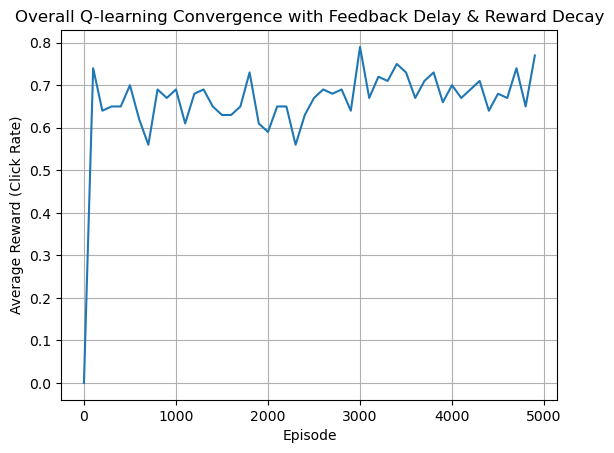

In [48]:
# Plotting overall average reward over time
plt.plot(range(0, num_episodes, 100), avg_reward_history)
plt.xlabel('Episode')
plt.ylabel('Average Reward (Click Rate)')
plt.title('Overall Q-learning Convergence with Feedback Delay & Reward Decay')
plt.grid(True)
plt.show()


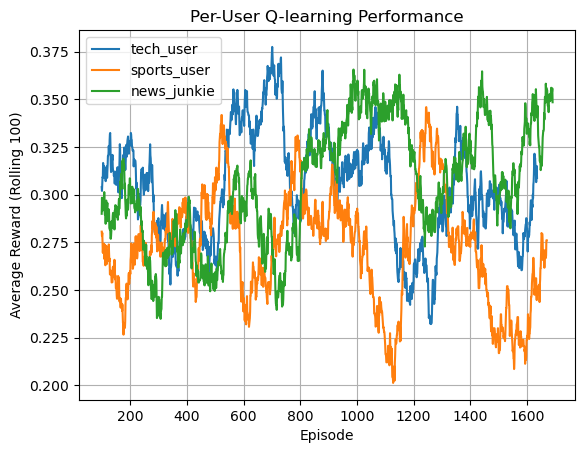

In [49]:
# Plotting individual user reward curves
for user in users:
    rolling_avg = pd.Series(user_reward_history[user]).rolling(100).mean()
    plt.plot(rolling_avg, label=user)

plt.xlabel("Episode")
plt.ylabel("Average Reward (Rolling 100)")
plt.title("Per-User Q-learning Performance")
plt.legend()
plt.grid(True)
plt.show()


In [50]:
# Final Q-table (converted to DataFrame for display)
q_table_df = pd.DataFrame(Q).T
print("\nFinal Q-table (Estimated Value per Category):")
print(q_table_df)



Final Q-table (Estimated Value per Category):
                    0         1         2         3         4
tech_user    8.242967  7.591662  7.654851  8.155313  7.513634
sports_user  6.517369  6.630764  6.474584  6.285611  7.311566
news_junkie  7.318204  7.177041  7.903124  7.436242  7.283478


In [53]:
# Recommendation function
def recommend(user):
    best_article_idx = np.argmax(Q[user])
    article = article_catalog[best_article_idx]
    print(f"Recommended article for {user}: '{article['title']}' [{article['category']}]")

# Test recommendations
print("\nSample Recommendations:")
for u in users:
    recommend(u)


Sample Recommendations:
Recommended article for tech_user: 'AI Breakthrough' [Tech]
Recommended article for sports_user: 'Olympics Recap' [Sports]
Recommended article for news_junkie: 'Election Update' [Politics]
